<a href="https://colab.research.google.com/github/anshuldeoli04/newcolab/blob/main/Handwritten_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**-
# **Handwritten Digit Prediction - Classification Analysis**

# Objective-
The objective of this project is to develop and evaluate a machine learning model capable of accurately classifying handwritten digits. This will be achieved by utilizing various machine learning algorithms and techniques, including data preprocessing, feature extraction, model training, and validation. The expected outcome is to achieve a high level of accuracy in digit recognition, thereby demonstrating the potential of machine learning in automating the process of handwritten digit classification. This project is relevant as it showcases the application of machine learning in solving real-world problems and provides insights into the development of effective classification models.

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Import Data**

In [2]:
from sklearn.datasets import load_digits

In [3]:
df=load_digits()

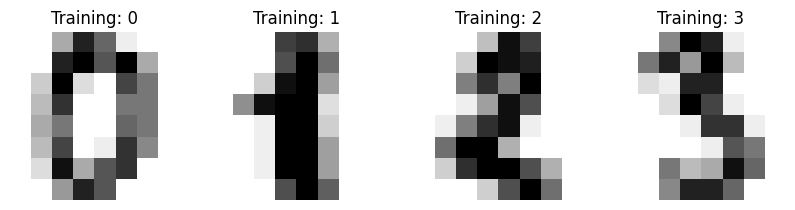

In [4]:
_,axes = plt.subplots(nrows=1,ncols=4, figsize=(10,3))
for ax, image, lable in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i" % lable)

# **Data Preprocessing**
Flatten Image











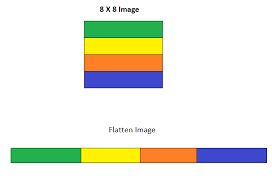


In [5]:
df.images.shape

(1797, 8, 8)

In [6]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
df.images[0].shape

(8, 8)

In [8]:
len(df.images)

1797

In [9]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# **Scaling Image Data**


In [11]:
data.min()

0.0

In [12]:
data.max()

16.0

In [13]:
data=data/16

In [14]:
data.min()

0.0

In [15]:
data.max()

1.0

In [16]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,df.target,test_size=0.3)

In [ ]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

# **Predict Test Data**

In [19]:
y_pred = rf.predict(x_test)

In [20]:
y_pred

array([2, 5, 6, 7, 8, 8, 3, 9, 7, 3, 7, 5, 5, 7, 2, 1, 5, 1, 5, 7, 9, 6,
       3, 1, 2, 5, 1, 5, 8, 4, 4, 7, 5, 0, 2, 6, 4, 8, 5, 8, 2, 2, 3, 9,
       9, 6, 9, 9, 0, 4, 2, 8, 6, 4, 3, 4, 1, 2, 1, 6, 4, 0, 0, 2, 1, 9,
       2, 8, 3, 6, 6, 0, 3, 4, 4, 3, 5, 9, 5, 2, 0, 9, 8, 4, 9, 0, 7, 8,
       9, 9, 3, 8, 9, 2, 1, 2, 0, 6, 9, 7, 2, 0, 0, 6, 3, 7, 1, 3, 5, 4,
       1, 1, 2, 1, 3, 2, 8, 9, 7, 3, 9, 4, 5, 2, 2, 2, 0, 7, 5, 3, 0, 7,
       6, 0, 5, 8, 5, 4, 1, 0, 5, 6, 8, 2, 6, 4, 3, 1, 4, 2, 4, 9, 3, 7,
       9, 3, 9, 1, 1, 8, 6, 9, 2, 5, 7, 6, 1, 0, 7, 2, 4, 7, 4, 2, 1, 1,
       2, 9, 0, 7, 9, 9, 9, 0, 9, 8, 3, 1, 1, 4, 5, 6, 1, 9, 4, 3, 1, 8,
       9, 9, 1, 3, 8, 2, 8, 2, 9, 1, 4, 5, 5, 5, 8, 2, 7, 5, 1, 8, 3, 0,
       3, 9, 9, 9, 5, 3, 2, 3, 3, 2, 0, 2, 3, 3, 2, 7, 4, 9, 5, 7, 2, 0,
       6, 3, 7, 8, 1, 2, 2, 6, 4, 1, 4, 0, 0, 1, 1, 7, 7, 9, 8, 8, 9, 7,
       6, 0, 0, 5, 6, 2, 8, 1, 2, 9, 8, 8, 3, 2, 2, 8, 4, 1, 1, 7, 5, 1,
       3, 9, 4, 5, 9, 0, 1, 8, 4, 2, 6, 7, 7, 6, 3,

# **Model Accuracy**

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 63,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 64,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 53,  0,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0, 50,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 53,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 50,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 61]])

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.97      1.00      0.98        63
           2       1.00      0.98      0.99        65
           3       0.96      0.93      0.95        57
           4       1.00      0.96      0.98        52
           5       0.95      0.98      0.96        54
           6       0.98      0.96      0.97        51
           7       0.91      1.00      0.95        42
           8       1.00      0.94      0.97        53
           9       0.95      0.95      0.95        64

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

